# Part II - Communicating Data Findings
## by Peace Ugbekile



## Investigation Overview


> In this presentation, I will be showcasing how certain variables affect borrowers' ability to complete their loan repayment as well as some factors that affect their Annual Percentage Rate (APR).


## Dataset Overview

> The dataset for exploration contains a total of 77556 loans with 16 loan attributes.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# loading my final dataset into a pandas dataframe
loan_data = pd.read_csv('cleanedloan_data.csv')

## Loan Distribution by Year and Month

> The number of loan availment is highest in January and loan disbursement increased at an increasing rate between 2009 - 2013 and then declined in 2014. This could have been because of the increase in defaults or bad loans.

Text(0, 0.5, 'Count')

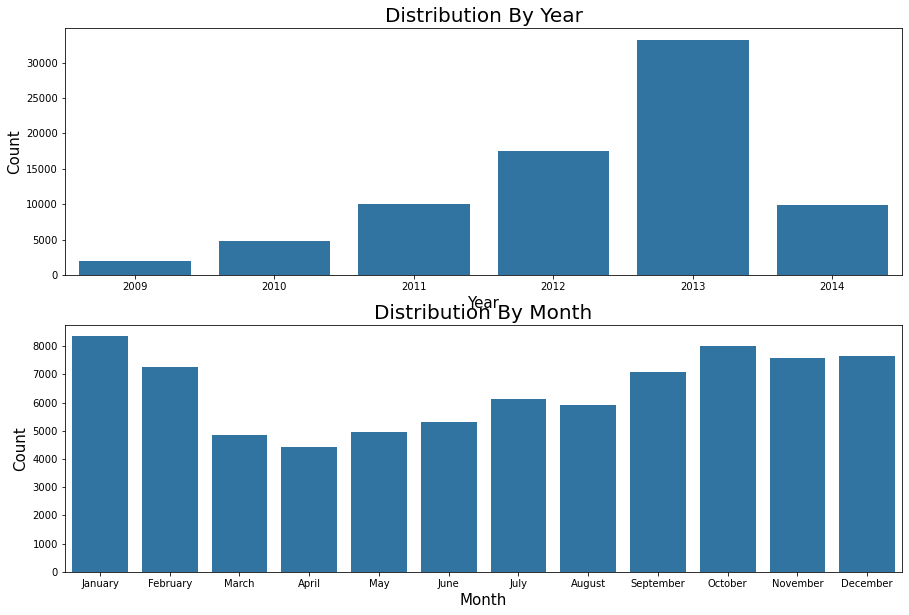

In [3]:
Ordered_month = ['January','February','March','April','May','June','July','August','September','October','November','December']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = Ordered_month)
loan_data['Month'] = loan_data['Month'].astype(ordered_var)
loan_data.groupby('Month')['ListingNumber'].count()
fig, ax = plt.subplots(nrows=2, figsize = [15,10])
default_color = sb.color_palette()[0]
sb.countplot(data = loan_data, x = 'Year', color = default_color, ax = ax[0])
sb.countplot(data = loan_data, x = 'Month', color = default_color, ax = ax[1])
ax[0].set_title('Distribution By Year', fontsize = 20)
ax[0].set_xlabel('Year', fontsize = 15)
ax[0].set_ylabel('Count', fontsize = 15)
ax[1].set_title('Distribution By Month', fontsize = 20)
ax[1].set_xlabel('Month', fontsize = 15)
ax[1].set_ylabel('Count', fontsize = 15)

## Distribution of Loan Status

> The currently running loans and completed loan are more than defaults for the period under observation.

Text(0, 0.5, 'Count')

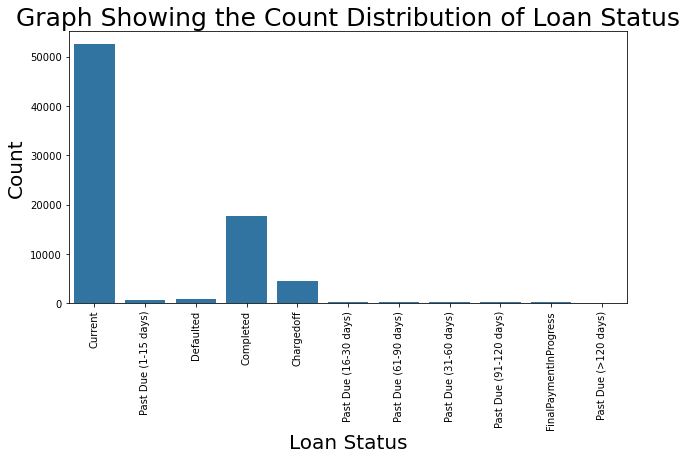

In [4]:
plt.figure(figsize=[10, 5])
base_color = sb.color_palette()[0]
sb.countplot(data=loan_data, x='LoanStatus', color=base_color);
plt.xticks(rotation=90)
plt.title('Graph Showing the Count Distribution of Loan Status', fontsize = 25)
plt.xlabel('Loan Status', fontsize = 20 );
plt.ylabel('Count', fontsize = 20 )

## Distribution of Borrowers' APR

> Borrowers' Annual Percentage Rate is multimodal with the highest peak found between 0.35 and 0.37 and infinitesimal number of loans with APR greater than 0.4.

Text(0.5, 1.0, 'Graph Showing the Distribution of APR For Borrowers')

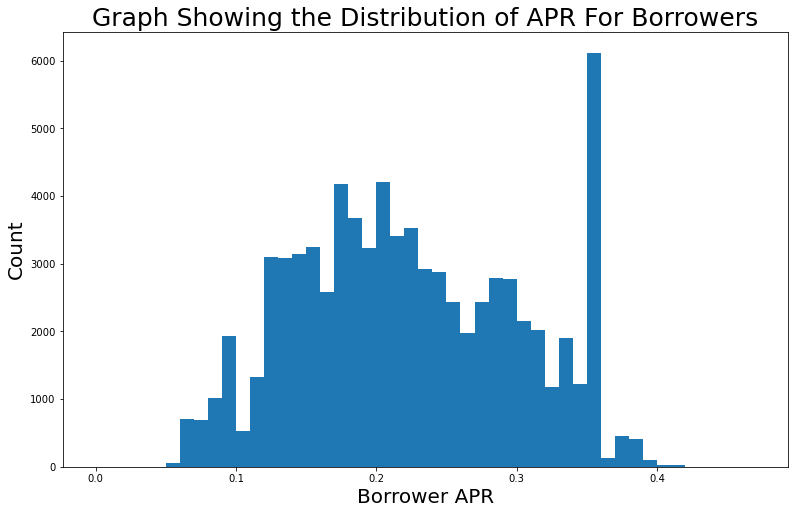

In [5]:
bins = np.arange(0, loan_data.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[13,8])
plt.hist(data = loan_data, x = 'BorrowerAPR', bins = bins);
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Borrower APR', fontsize = 20);
plt.title('Graph Showing the Distribution of APR For Borrowers', fontsize = 25)

## Distribution of Monthly Income

> Monthly income is extremely right skewed with majority of the borrowers earning within the mean income amount of about 5,964 dollars and extremely few persons earning above 15,000 dollars.

Text(0.5, 1.0, 'Graph Showing the Distribution of Monthly Income')

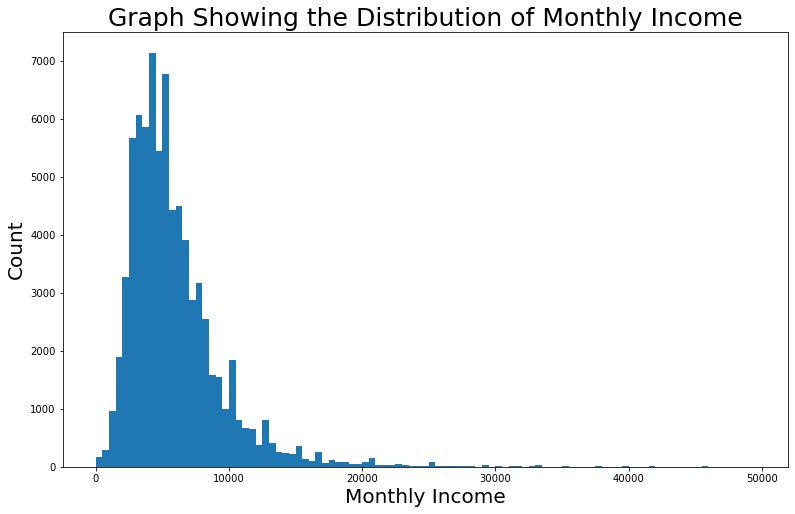

In [6]:
bin = np.arange(0, 50000, 500)
plt.figure(figsize=[13,8])
plt.hist(data = loan_data, x = 'StatedMonthlyIncome', bins=bin);
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Monthly Income', fontsize = 20);
plt.title('Graph Showing the Distribution of Monthly Income', fontsize = 25)

## Loan Status vs Original Loan Amount

> The mean loan amount for the completed loans is less than all other status except current (which represents ongoing loans not yet classed as defaults or past due and whose status could change with time) and past due (61 - 90 days). This implies that the borrowers are more likely to complete their repayment if the loan amount is small. 

Text(0.5, 1.0, 'A Violin Plot Showing the Relationship Between Loan Status and Original Loan Amount')

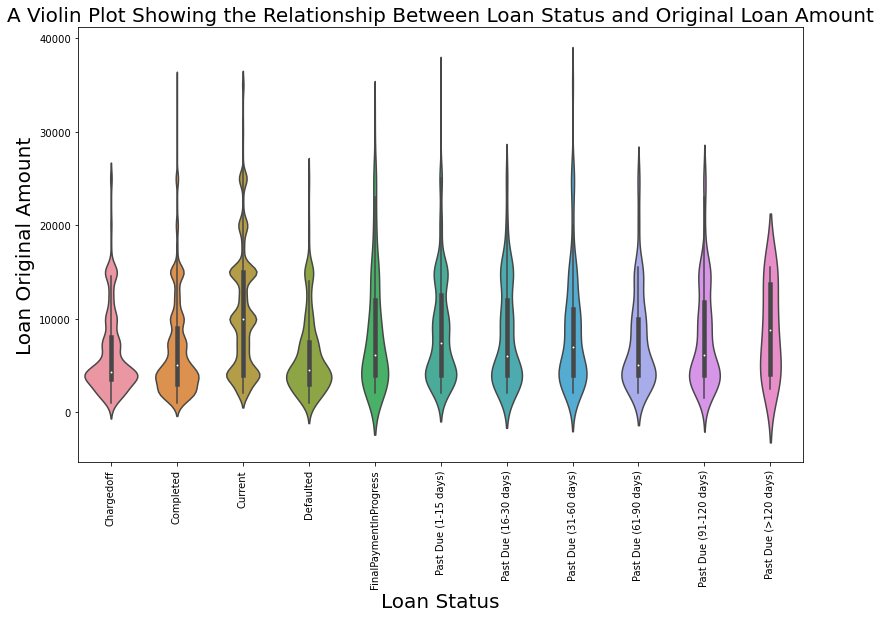

In [7]:
Loan_status = ['Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress', 'Past Due (1-15 days)', 'Past Due (16-30 days)',
              'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)']
Loanstat = pd.api.types.CategoricalDtype(ordered=True, categories=Loan_status)
loan_data['LoanStatus'] = loan_data['LoanStatus'].astype(Loanstat);
plt.figure(figsize=[13, 8])
sb.violinplot(data=loan_data, x='LoanStatus', y='LoanOriginalAmount');
plt.xticks(rotation=90)
plt.xlabel('Loan Status', fontsize = 20);
plt.ylabel('Loan Original Amount', fontsize = 20);
plt.title('A Violin Plot Showing the Relationship Between Loan Status and Original Loan Amount', fontsize = 20)

## Loan Status vs Monthly Income

> The mean income for completed, current and payment in progress loans was higher than all other forms of bad or defaulting loans. This further strengthens the hypothesis that income affects ability to pay down on loans.

Text(0.5, 1.0, 'A Box Plot Showing the Relationship Between Loan Status and Monthly Income')

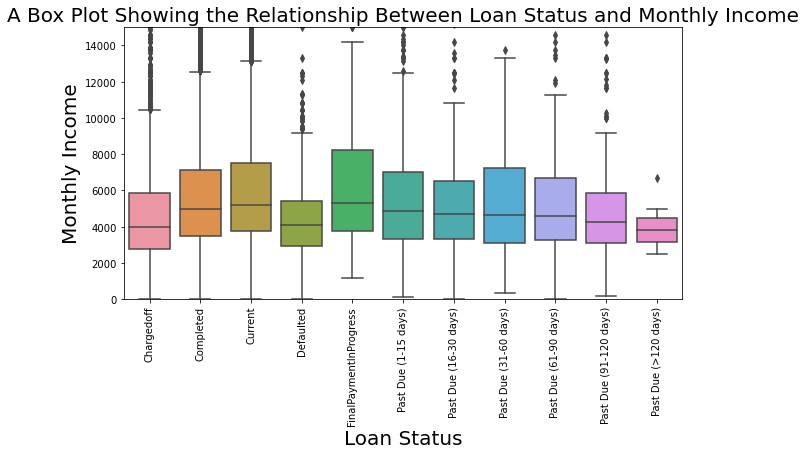

In [8]:
plt.figure(figsize=[10, 5])
sb.boxplot(data=loan_data, x='LoanStatus', y='StatedMonthlyIncome');
plt.xticks(rotation=90)
plt.ylim(0, 15000)
plt.xlabel('Loan Status', fontsize = 20);
plt.ylabel('Monthly Income', fontsize = 20);
plt.title('A Box Plot Showing the Relationship Between Loan Status and Monthly Income', fontsize = 20)

## Borrowers' APR vs Loan Amount

> Borrower APR is negatively correlated with loan original amount suggesting that the more the loan amount, the lower the APR. 

Text(0.5, 1.0, 'A Scatterplot Showing the Relationship Between APR and Loan Amount')

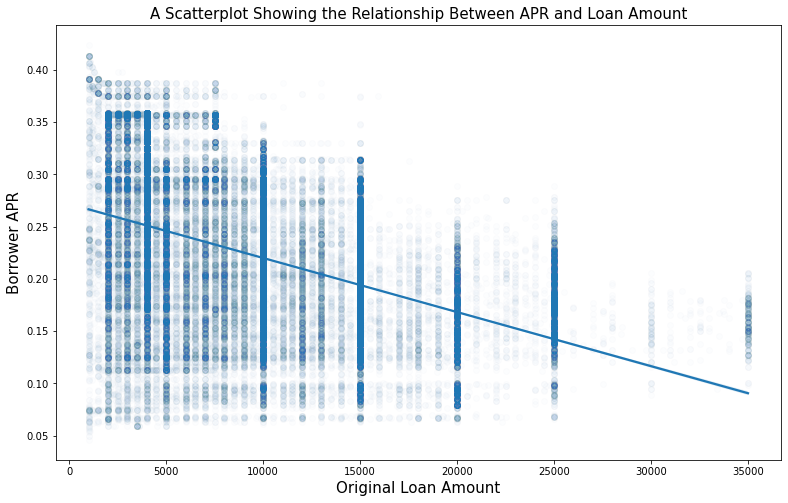

In [9]:
plt.figure(figsize = [13,8])
sb.regplot(data = loan_data, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});
plt.xlabel('Original Loan Amount', fontsize = 15);
plt.ylabel('Borrower APR', fontsize = 15);
plt.title('A Scatterplot Showing the Relationship Between APR and Loan Amount', fontsize = 15)

## Borrowers' APR vs Prosper Score

> The borrower APR decreases with the increasingly better prosper score. Borrowers with the best Prosper scores have the lowest APR. It means that the Prosper rating has a strong effect on borrower APR.


Text(0.5, 1.0, 'A Scatterplot Showing the Relationship Between APR and Prosper Score')

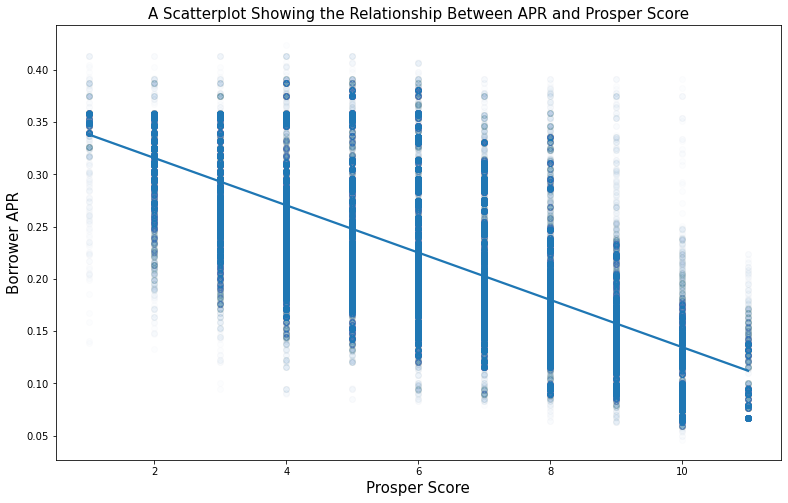

In [10]:
plt.figure(figsize = [13,8])
sb.regplot(data = loan_data, x = 'ProsperScore', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});
plt.xlabel('Prosper Score', fontsize = 15);
plt.ylabel('Borrower APR', fontsize = 15);
plt.title('A Scatterplot Showing the Relationship Between APR and Prosper Score', fontsize = 15)

##  Loan Status vs Borrowers' Rate

> The mean interest rate for "completed" loans, "current" loans and "final payment in progress" loans was lower than for defaulting and other bad loans (past due). 

Text(0.5, 1.0, 'A Box Plot Showing the Relationship Between Loan Status and Borrower Rate')

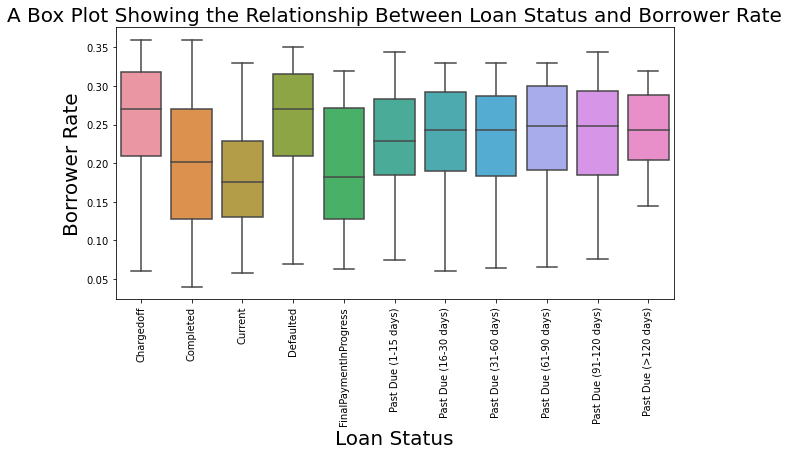

In [11]:
plt.figure(figsize=[10, 5])
sb.boxplot(data=loan_data, x='LoanStatus', y='BorrowerRate');
plt.xticks(rotation=90)
plt.xlabel('Loan Status', fontsize = 20);
plt.ylabel('Borrower Rate', fontsize = 20);
plt.title('A Box Plot Showing the Relationship Between Loan Status and Borrower Rate', fontsize = 20)

In [ ]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve --no-input --no-prompt